In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Load and Check Data

In [2]:
# load the csv
csv_path = 'time_series_covid19_confirmed_US.csv'
csv = pd.read_csv(csv_path)
#check the data
csv

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2212,2230,2242,2267,2283,2304,2328,2351,2385,2417
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7061,7097,7134,7188,7226,7263,7348,7409,7454,7523
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1079,1080,1090,1092,1095,1098,1107,1112,1113,1117
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,897,907,917,924,926,932,948,961,966,973
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2188,2222,2253,2286,2297,2335,2378,2400,2429,2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,873,897,922,932,977,1007,1022,1025,1066,1108
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,518,529,542,544,551,568,614,627,664,686
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,175,179,188,185,187,190,197,199,203,206


In [3]:
# extract the list of columns
columns = list(csv.columns)
# daily data are after column 11
days = columns[11:]
SOI = ['Massachusetts', 'Illinois', 'New York', 'Texas', 'California', 'Florida']

### Functions to Get State Arrays and Perform PCA

In [4]:
def get_state_arr(state, days):
    # restrict to your state's data
    csv_state = csv[csv['Province_State'] == state]
    # find the new daily cases
    daily_new_cases = []
    prev_sum = 0
    for day in days:
        counties_sum = 0
        for county in csv_state[day]:
            counties_sum += county
        
        daily_new_cases.append(counties_sum - prev_sum)
        prev_sum = counties_sum
        state_arr = np.asarray(daily_new_cases)
        state_arr = state_arr/(np.max(abs(state_arr)))
    return state_arr

In [5]:
def PCA_weekly_rec(state, states, nationwide):
    ind = np.where(states ==  state)
    current = US[ind][0]
    weekly = np.zeros((42,7))
    for i in range(42):
        weekly[i] = current[i*7:i*7+7]
    mu = np.mean(weekly, 0)
    weekly_mr = weekly - mu
    C = weekly_mr@weekly_mr.T
    D,U = np.linalg.eig(C)
    W_main = U[0:1,:]
    Y = W_main@weekly_mr
    weekly_rec = (W_main.T@(Y)) + mu
    weekly_rec_mu = np.mean(weekly_rec, 0)
    return weekly, weekly_mr, weekly_rec, weekly_rec_mu

### Calculate PCA and PCA Mean for Each State

In [6]:
states = np.array(["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"])
US = np.zeros((51, 297))
for i in range(len(states)):
    US[i] = get_state_arr(states[i], days)

In [7]:
AK_weekly, AK_weekly_mr, AK_weekly_rec, AK_weekly_rec_mu= PCA_weekly_rec(states[0],states, US)
AL_weekly, AL_weekly_mr, AL_weekly_rec, AL_weekly_rec_mu= PCA_weekly_rec(states[1],states, US)
AR_weekly, AR_weekly_mr, AR_weekly_rec, AR_weekly_rec_mu= PCA_weekly_rec(states[2],states, US)
AZ_weekly, AZ_weekly_mr, AZ_weekly_rec, AZ_weekly_rec_mu= PCA_weekly_rec(states[3],states, US)
CA_weekly, CA_weekly_mr, CA_weekly_rec, CA_weekly_rec_mu= PCA_weekly_rec(states[4],states, US)
CO_weekly, CO_weekly_mr, CO_weekly_rec, CO_weekly_rec_mu= PCA_weekly_rec(states[5],states, US)
CT_weekly, CT_weekly_mr, CT_weekly_rec, CT_weekly_rec_mu= PCA_weekly_rec(states[6],states, US)
DE_weekly, DE_weekly_mr, DE_weekly_rec, DE_weekly_rec_mu= PCA_weekly_rec(states[7],states, US)
FL_weekly, FL_weekly_mr, FL_weekly_rec, FL_weekly_rec_mu= PCA_weekly_rec(states[8],states, US)
GA_weekly, GA_weekly_mr, GA_weekly_rec, GA_weekly_rec_mu= PCA_weekly_rec(states[9],states, US)
HI_weekly, HI_weekly_mr, HI_weekly_rec, HI_weekly_rec_mu= PCA_weekly_rec(states[10],states, US)
IA_weekly, IA_weekly_mr, IA_weekly_rec, IA_weekly_rec_mu= PCA_weekly_rec(states[11],states, US)
ID_weekly, ID_weekly_mr, ID_weekly_rec, ID_weekly_rec_mu= PCA_weekly_rec(states[12],states, US)
IL_weekly, IL_weekly_mr, IL_weekly_rec, IL_weekly_rec_mu= PCA_weekly_rec(states[13],states, US)
IN_weekly, IN_weekly_mr, IN_weekly_rec, IN_weekly_rec_mu= PCA_weekly_rec(states[14],states, US)
KS_weekly, KS_weekly_mr, KS_weekly_rec, KS_weekly_rec_mu= PCA_weekly_rec(states[15],states, US)
KY_weekly, KY_weekly_mr, KY_weekly_rec, KY_weekly_rec_mu= PCA_weekly_rec(states[16],states, US)
LA_weekly, LA_weekly_mr, LA_weekly_rec, LA_weekly_rec_mu= PCA_weekly_rec(states[17],states, US)
MA_weekly, MA_weekly_mr, MA_weekly_rec, MA_weekly_rec_mu= PCA_weekly_rec(states[18],states, US)
MD_weekly, MD_weekly_mr, MD_weekly_rec, MD_weekly_rec_mu= PCA_weekly_rec(states[19],states, US)
ME_weekly, ME_weekly_mr, ME_weekly_rec, ME_weekly_rec_mu= PCA_weekly_rec(states[20],states, US)
MI_weekly, MI_weekly_mr, MI_weekly_rec, MI_weekly_rec_mu= PCA_weekly_rec(states[21],states, US)
MN_weekly, MN_weekly_mr, MN_weekly_rec, MN_weekly_rec_mu= PCA_weekly_rec(states[22],states, US)
MO_weekly, MO_weekly_mr, MO_weekly_rec, MO_weekly_rec_mu= PCA_weekly_rec(states[23],states, US)
MS_weekly, MS_weekly_mr, MS_weekly_rec, MS_weekly_rec_mu= PCA_weekly_rec(states[24],states, US)
MT_weekly, MT_weekly_mr, MT_weekly_rec, MT_weekly_rec_mu= PCA_weekly_rec(states[25],states, US)
NC_weekly, NC_weekly_mr, NC_weekly_rec, NC_weekly_rec_mu= PCA_weekly_rec(states[26],states, US)
ND_weekly, ND_weekly_mr, ND_weekly_rec, ND_weekly_rec_mu= PCA_weekly_rec(states[27],states, US)
NE_weekly, NE_weekly_mr, NE_weekly_rec, NE_weekly_rec_mu= PCA_weekly_rec(states[28],states, US)
NH_weekly, NH_weekly_mr, NH_weekly_rec, NH_weekly_rec_mu= PCA_weekly_rec(states[29],states, US)
NJ_weekly, NJ_weekly_mr, NJ_weekly_rec, NJ_weekly_rec_mu= PCA_weekly_rec(states[30],states, US)
NM_weekly, NM_weekly_mr, NM_weekly_rec, NM_weekly_rec_mu= PCA_weekly_rec(states[31],states, US)
NV_weekly, NV_weekly_mr, NV_weekly_rec, NV_weekly_rec_mu= PCA_weekly_rec(states[32],states, US)
NY_weekly, NY_weekly_mr, NY_weekly_rec, NY_weekly_rec_mu= PCA_weekly_rec(states[33],states, US)
OH_weekly, OH_weekly_mr, OH_weekly_rec, OH_weekly_rec_mu= PCA_weekly_rec(states[34],states, US)
OK_weekly, OK_weekly_mr, OK_weekly_rec, OK_weekly_rec_mu= PCA_weekly_rec(states[35],states, US)
OR_weekly, OR_weekly_mr, OR_weekly_rec, OR_weekly_rec_mu= PCA_weekly_rec(states[36],states, US)
PA_weekly, PA_weekly_mr, PA_weekly_rec, PA_weekly_rec_mu= PCA_weekly_rec(states[37],states, US)
PR_weekly, PR_weekly_mr, PR_weekly_rec, PR_weekly_rec_mu= PCA_weekly_rec(states[38],states, US)
RI_weekly, RI_weekly_mr, RI_weekly_rec, RI_weekly_rec_mu= PCA_weekly_rec(states[39],states, US)
SC_weekly, SC_weekly_mr, SC_weekly_rec, SC_weekly_rec_mu= PCA_weekly_rec(states[40],states, US)
SD_weekly, SD_weekly_mr, SD_weekly_rec, SD_weekly_rec_mu= PCA_weekly_rec(states[41],states, US)
TN_weekly, TN_weekly_mr, TN_weekly_rec, TN_weekly_rec_mu= PCA_weekly_rec(states[42],states, US)
TX_weekly, TX_weekly_mr, TX_weekly_rec, TX_weekly_rec_mu= PCA_weekly_rec(states[43],states, US)
UT_weekly, UT_weekly_mr, UT_weekly_rec, UT_weekly_rec_mu= PCA_weekly_rec(states[44],states, US)
VA_weekly, VA_weekly_mr, VA_weekly_rec, VA_weekly_rec_mu= PCA_weekly_rec(states[45],states, US)
VT_weekly, VT_weekly_mr, VT_weekly_rec, VT_weekly_rec_mu= PCA_weekly_rec(states[46],states, US)
WA_weekly, WA_weekly_mr, WA_weekly_rec, WA_weekly_rec_mu= PCA_weekly_rec(states[47],states, US)
WI_weekly, WI_weekly_mr, WI_weekly_rec, WI_weekly_rec_mu= PCA_weekly_rec(states[48],states, US)
WV_weekly, WV_weekly_mr, WV_weekly_rec, WV_weekly_rec_mu= PCA_weekly_rec(states[49],states, US)
WY_weekly, WY_weekly_mr, WY_weekly_rec, WY_weekly_rec_mu= PCA_weekly_rec(states[50],states, US)

In [8]:
pca_means = [AK_weekly_rec_mu, AL_weekly_rec_mu, AR_weekly_rec_mu, AZ_weekly_rec_mu, CA_weekly_rec_mu, 
CO_weekly_rec_mu, CT_weekly_rec_mu, DE_weekly_rec_mu, FL_weekly_rec_mu, GA_weekly_rec_mu, HI_weekly_rec_mu, 
IA_weekly_rec_mu, ID_weekly_rec_mu, IL_weekly_rec_mu, IN_weekly_rec_mu, KS_weekly_rec_mu, KY_weekly_rec_mu, 
LA_weekly_rec_mu, MA_weekly_rec_mu, MD_weekly_rec_mu, ME_weekly_rec_mu, MI_weekly_rec_mu, MN_weekly_rec_mu, 
MO_weekly_rec_mu, MS_weekly_rec_mu, MT_weekly_rec_mu, NC_weekly_rec_mu, ND_weekly_rec_mu, NE_weekly_rec_mu, 
NH_weekly_rec_mu,NJ_weekly_rec_mu, NM_weekly_rec_mu, NV_weekly_rec_mu, NY_weekly_rec_mu, OH_weekly_rec_mu, 
OK_weekly_rec_mu, OR_weekly_rec_mu, PA_weekly_rec_mu, PR_weekly_rec_mu, RI_weekly_rec_mu, SC_weekly_rec_mu,
SD_weekly_rec_mu, TN_weekly_rec_mu, TX_weekly_rec_mu, UT_weekly_rec_mu, VA_weekly_rec_mu, VT_weekly_rec_mu, 
WA_weekly_rec_mu, WI_weekly_rec_mu, WV_weekly_rec_mu, WY_weekly_rec_mu]
print(len(pca_means))

51


### Remove the mean from each state PCA mean and plot all 50 states

In [9]:
state_pca_means = np.zeros((51,7))
for i in range(len(pca_means)):
    state_pca_means[i,:] = pca_means[i]


meanofmeans = state_pca_means.mean(axis=1)


state_pca_mr = np.zeros((51,7))
for s in range(51):
    state = state_pca_means[s,:]
    statemr = []
    for d in range(7):
        statemr.append(state[d] - meanofmeans[s])
    state_pca_mr[s,:] = statemr    

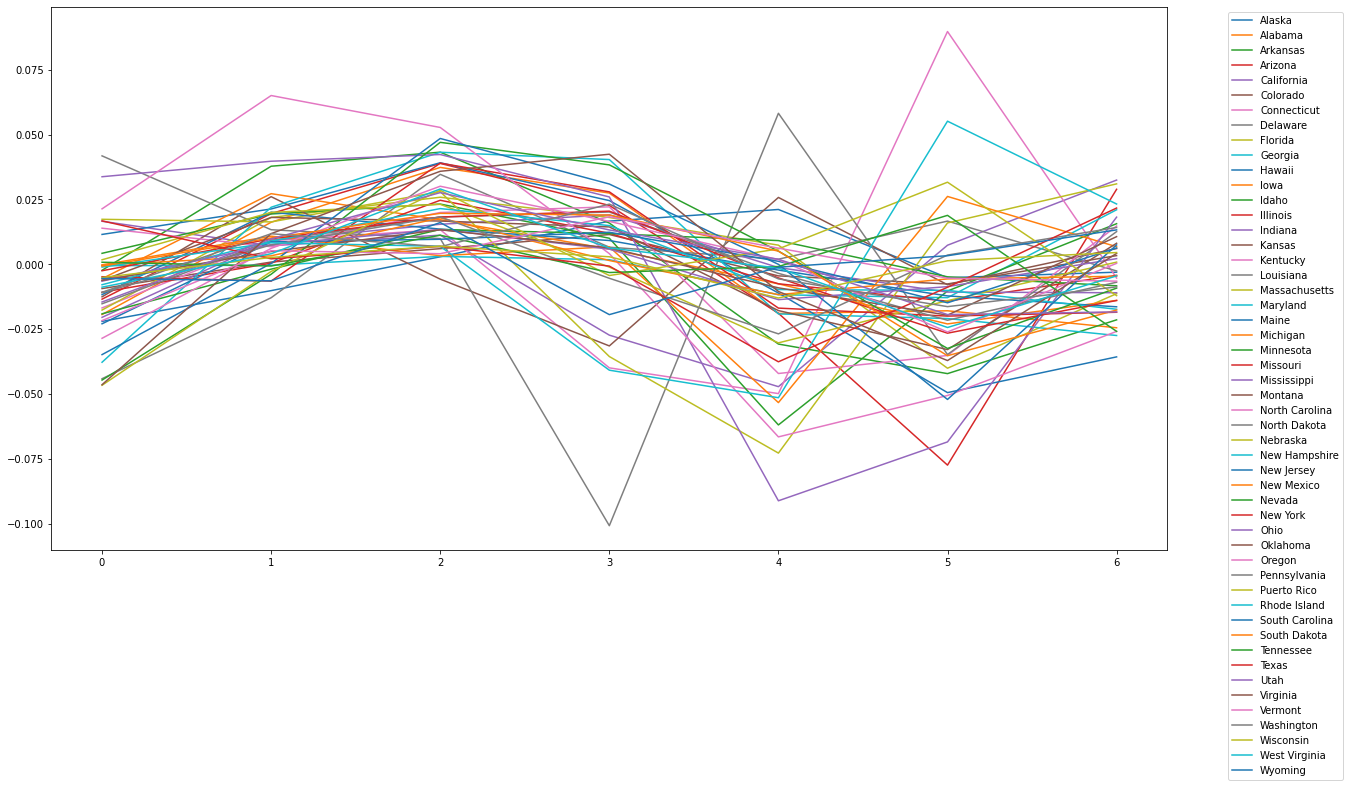

In [10]:
plt.figure(figsize=(20,10))
for i in range(51):
    state = state_pca_mr[i,:]
    plt.plot(state)
plt.legend(states, bbox_to_anchor=(1.05, 1))
#plt.ylim(-100,100)

## Group states by peaks and valleys

In [11]:
#Start with max vals:
Sunmax = []
Monmax = []
Tuesmax = []
Wedsmax = []
Thursmax = []
Frimax = []
Satmax = []

Sunmin = []
Monmin = []
Tuesmin = []
Wedsmin = []
Thursmin = []
Frimin = []
Satmin = []

for i in range(51):
    week = list(state_pca_mr[i,:])
    daymax = week.index(max(week))
    daymin = week.index(min(week))
    if daymax == 0:
        Wedsmax.append(states[i])
    if daymax == 1:
        Thursmax.append(states[i])
    if daymax == 2:
        Frimax.append(states[i])
    if daymax == 3:
        Satmax.append(states[i])
    if daymax == 4:
        Sunmax.append(states[i])
    if daymax == 5:
        Monmax.append(states[i])
    if daymax == 6:
        Tuesmax.append(states[i])
    if daymin == 0:
        Wedsmin.append(states[i])
    if daymin == 1:
        Thursmin.append(states[i])
    if daymin == 2:
        Frimin.append(states[i])
    if daymin == 3:
        Satmin.append(states[i])
    if daymin == 4:
        Sunmin.append(states[i])
    if daymin == 5:
        Monmin.append(states[i])
    if daymin == 6:
        Tuesmin.append(states[i])
        
'''
print("Number of States with Max Cases on Following Days: ")        
print("Sunday: " + str(len(Sunmax)))
print("Monday: " + str(len(Monmax)))
print("Tuesday: " + str(len(Tuesmax)))
print("Wednesday: " + str(len(Wedsmax)))
print("Thursday: " + str(len(Thursmax)))
print("Friday: " + str(len(Frimax)))
print("Saturday: " + str(len(Satmax)))

print("Number of States with Min Cases on Following Days: ")        
print("Sunday: " + str(len(Sunmin)))
print("Monday: " + str(len(Monmin)))
print("Tuesday: " + str(len(Tuesmin)))
print("Wednesday: " + str(len(Wedsmin)))
print("Thursday: " + str(len(Thursmin)))
print("Friday: " + str(len(Frimin)))
print("Saturday: " + str(len(Satmin)))
'''

print("States with Max Cases on Following Days: ")        
print("Sunday: " + str((Sunmax)))
print("Monday: " + str((Monmax)))
print("Tuesday: " + str((Tuesmax)))
print("Wednesday: " + str((Wedsmax)))
print("Thursday: " + str((Thursmax)))
print("Friday: " + str((Frimax)))
print("Saturday: " + str((Satmax)))
print("     ")
print("States with Min Cases on Following Days: ")        
print("Sunday: " + str((Sunmin)))
print("Monday: " + str((Monmin)))
print("Tuesday: " + str((Tuesmin)))
print("Wednesday: " + str((Wedsmin)))
print("Thursday: " + str((Thursmin)))
print("Friday: " + str((Frimin)))
print("Saturday: " + str((Satmin)))


States with Max Cases on Following Days: 
Sunday: ['Alaska', 'Louisiana']
Monday: ['Connecticut', 'Michigan', 'Puerto Rico', 'Rhode Island', 'Tennessee']
Tuesday: ['California', 'Georgia', 'Massachusetts', 'Texas']
Wednesday: []
Thursday: ['Iowa', 'Kansas', 'Maine', 'Montana', 'North Carolina']
Friday: ['Alabama', 'Arkansas', 'Arizona', 'Delaware', 'Florida', 'Hawaii', 'Idaho', 'Illinois', 'Maryland', 'Minnesota', 'Missouri', 'Mississippi', 'Nebraska', 'New Hampshire', 'New Mexico', 'Nevada', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Utah', 'Wisconsin', 'West Virginia', 'Wyoming']
Saturday: ['Colorado', 'Indiana', 'Kentucky', 'North Dakota', 'New Jersey', 'New York', 'Virginia', 'Vermont', 'Washington']
     
States with Min Cases on Following Days: 
Sunday: ['California', 'Connecticut', 'Idaho', 'Kentucky', 'Massachusetts', 'Michigan', 'Mississippi', 'North Carolina', 'Nebraska', 'New Mexico', 'Ohio', 'Pennsylvania', 'Rhode Island', 'Texas', 'Wis

In [ ]:
# for further grouping: want to find groups of states that have similar highs and lows: 
#Like states that peak monday or tuesday AND have mins on saturday or sunday


#Maybe have a function that prints the min days of max days:
#so like for all of the Monday-peaking states, print the days of their mins, that way we can look for potential groups?

## Look for Finer-Grain Groupings 

In [16]:
#This function takes in a list of states which peak at a given day, and returns the days at which each of those states
#reaches their minimum point: useful for trying to group states not just by maxes or mins, but by maxes and mins
def maxmins(maxday):
    outlist = []
    for s in maxday:
        if s in Sunmin:
            outlist.append("Sunday")
        elif s in Monmin:
            outlist.append("Monday")
        elif s in Tuesmin:
            outlist.append("Tuesday")
        elif s in Wedsmin:
            outlist.append("Wednesday")
        elif s in Thursmin:
            outlist.append("Thursday")
        elif s in Frimin:
            outlist.append("Friday")
        elif s in Satmin:
            outlist.append("Saturday")
    return outlist

Sunmaxmin = maxmins(Sunmax)
Monmaxmin = maxmins(Monmax)
Tuesmaxmin = maxmins(Tuesmax)
Wedsmaxmin = maxmins(Wedsmax)
Thursmaxmin = maxmins(Thursmax)
Frimaxmin = maxmins(Frimax)
Satmaxmin = maxmins(Satmax)
print(Sunmaxmin)
print(Monmaxmin)
print(Tuesmaxmin)
print(Wedsmaxmin)
print(Thursmaxmin)
print(Frimaxmin)
print(Satmaxmin)

    

['Wednesday', 'Saturday']
['Sunday', 'Sunday', 'Wednesday', 'Sunday', 'Tuesday']
['Sunday', 'Monday', 'Sunday', 'Sunday']
[]
['Monday', 'Saturday', 'Tuesday', 'Monday', 'Sunday']
['Tuesday', 'Monday', 'Monday', 'Wednesday', 'Monday', 'Monday', 'Sunday', 'Monday', 'Wednesday', 'Wednesday', 'Monday', 'Sunday', 'Sunday', 'Tuesday', 'Sunday', 'Wednesday', 'Sunday', 'Monday', 'Wednesday', 'Sunday', 'Monday', 'Monday', 'Monday', 'Sunday', 'Monday', 'Saturday']
['Wednesday', 'Wednesday', 'Sunday', 'Monday', 'Wednesday', 'Monday', 'Wednesday', 'Wednesday', 'Monday']


Ok so: 
states that have maxes on Saturday tend to have minimums on Wednesday
States that have maxes on Monday and Tuesday tend to have minimums on Sunday
States that have maxes on Friday tend to have mins on Monday or Wednesday

--> try to find the states which specifically fit these different patterns and plot them to see what they look like 




In [34]:
#Create the 4 largest max/min groups

mtmaxsumin = []
samaxwmin = []
fmaxmmin = []
fmaxwmin = []
for state in states:
    if state in Monmax:
        if state in Sunmin:
            mtmaxsumin.append(state)
    if state in Tuesmax:
        if state in Sunmin:
            mtmaxsumin.append(state)
    if state in Satmax:
        if state in Wedsmin:
            samaxwmin.append(state)
    if state in Frimax:
        if state in Monmin:
            fmaxmmin.append(state)
        if state in Wedsmin:
            fmaxwmin.append(state)
        
print(mtmaxsumin)
print(samaxwmin)
print(fmaxmmin)
print(fmaxwmin)        

['California', 'Connecticut', 'Massachusetts', 'Michigan', 'Rhode Island', 'Texas']
['Colorado', 'Indiana', 'New Jersey', 'Virginia', 'Vermont']
['Arkansas', 'Arizona', 'Florida', 'Hawaii', 'Illinois', 'Missouri', 'Oklahoma', 'South Carolina', 'South Dakota', 'Utah', 'West Virginia']
['Delaware', 'Maryland', 'Minnesota', 'Nevada', 'Oregon']


## Plot the 4 Largest Max/Min State Groupings

Text(0.5, 1.0, 'States with Max Caseloads on Monday/Tuesday and Min Caseloads on Sunday')

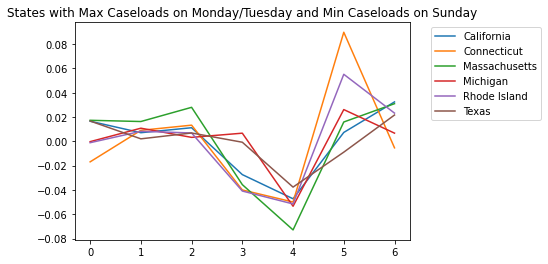

In [31]:
legend = []
for state in mtmaxsumin:
    stateslist = list(states)
    sindex = stateslist.index(state)
    plt.plot(state_pca_mr[sindex,:])
    legend.append(state)
plt.legend(legend,bbox_to_anchor=(1.05, 1))
plt.title("States with Max Caseloads on Monday/Tuesday and Min Caseloads on Sunday")

Text(0.5, 1.0, 'States with Max Caseloads on Saturday and Min Caseloads on Wednesday')

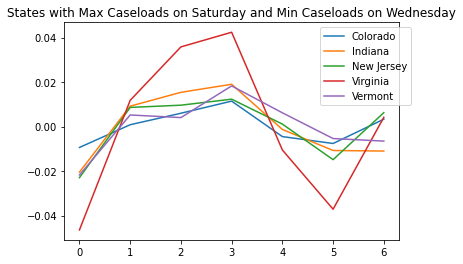

In [32]:
legend = []
for state in samaxwmin:
    stateslist = list(states)
    sindex = stateslist.index(state)
    plt.plot(state_pca_mr[sindex,:])
    legend.append(state)
plt.legend(legend,bbox_to_anchor=(1.05, 1))
plt.title("States with Max Caseloads on Saturday and Min Caseloads on Wednesday")

Text(0.5, 1.0, 'States with Max Caseloads on Friday and Min Caseloads on Monday')

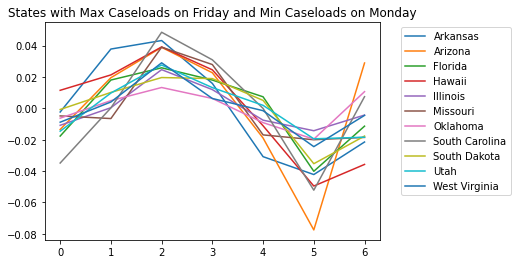

In [29]:
legend = []
for state in fmaxmmin:
    stateslist = list(states)
    sindex = stateslist.index(state)
    plt.plot(state_pca_mr[sindex,:])
    legend.append(state)
plt.legend(legend,bbox_to_anchor=(1.05, 1))
plt.title("States with Max Caseloads on Friday and Min Caseloads on Monday")

Text(0.5, 1.0, 'States with Max Caseloads on Friday and Min Caseloads on Wednesday')

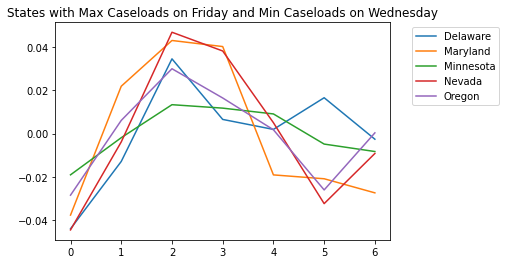

In [35]:
legend = []
for state in fmaxwmin:
    stateslist = list(states)
    sindex = stateslist.index(state)
    plt.plot(state_pca_mr[sindex,:])
    legend.append(state)
plt.legend(legend,bbox_to_anchor=(1.05, 1))
plt.title("States with Max Caseloads on Friday and Min Caseloads on Wednesday")